## Transmission Detection

We want to determine whether a signal contains a transmission sound in new observations. Based on our previous experiment and work, we have built models for the distribution of the transmission and background sounds. We would like to test if we obtain a new sample if it is from one of the two distributions. We can define the null hypothesis to be that the observation is from the background distribution, while the alternative that it is from the transmission distribution.

$\mathcal{H_0}: X \sim background $
 
$\mathcal{H_1}: X \sim transmission $

We can rewrite this is terms of the parameters of the skew-normal distributions that you have obtained from the fitting exercise.


$\mathcal{H_0}: X \sim skew\mathcal{N}(\alpha_{bg}, scale_{bg}, loc_{bg})$
 
$\mathcal{H_1}: X \sim skew\mathcal{N}(\alpha_{tr}, scale_{tr}, loc_{tr})$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import stats

We will read a small sample of 10 observations that we have stored in the files `test**.csv`.

In [2]:
data_path = "/home/jovyan/shared-public/WA_Shelf_data/"

In [3]:
# reading test dataset: select one of the test files test**.csv
df_test = pd.read_csv(data_path+"test11.csv")

In [4]:
df_test

,220730014532,220730063632,220729221232,220730105431,220730021233,220730054531,220730005433,220729220033,220729232432,220730093931
0,1.424839e+06,5.181788e+06,5.912475e+06,2.368643e+06,2.058101e+06,2.088547e+06,4.901691e+06,4.061401e+06,5.699358e+06,4.822533e+06
1,1.522264e+06,5.175699e+06,5.924653e+06,2.344287e+06,2.045923e+06,2.052012e+06,4.865157e+06,4.012689e+06,5.620200e+06,4.968671e+06
2,1.589244e+06,5.187877e+06,5.912475e+06,2.326020e+06,2.058101e+06,2.033745e+06,4.852979e+06,3.970065e+06,5.559309e+06,5.017383e+06
3,1.637956e+06,5.187877e+06,5.918564e+06,2.265129e+06,1.997211e+06,2.058101e+06,4.846890e+06,3.988333e+06,5.474063e+06,4.919958e+06
4,1.637956e+06,5.187877e+06,5.930742e+06,2.228595e+06,1.991122e+06,2.045923e+06,4.834712e+06,4.000511e+06,5.388816e+06,4.840801e+06
...,...,...,...,...,...,...,...,...,...,...
47995,8.159337e+06,1.534442e+06,3.848284e+06,1.717114e+06,1.887608e+05,3.878730e+06,2.301664e+06,2.033745e+06,2.338198e+06,1.589244e+06
47996,8.153248e+06,1.540532e+06,3.854373e+06,1.753649e+06,8.524680e+04,3.915264e+06,2.259040e+06,2.033745e+06,2.344287e+06,1.631867e+06
47997,8.214138e+06,1.522264e+06,3.854373e+06,1.784094e+06,-1.826717e+04,3.921353e+06,2.271218e+06,2.039834e+06,2.356465e+06,1.625778e+06
47998,8.208049e+06,1.552710e+06,3.860462e+06,1.778005e+06,-1.217811e+05,3.921353e+06,2.277307e+06,2.064190e+06,2.350376e+06,1.570977e+06


**TODO:** Process the test files through the same filtering and RMS conversion steps as we did in the fitting notebook.

In [5]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = sp.signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = sp.signal.sosfilt(sos,inputSignal)
    
    return outputSignal

In [6]:
flimits = [3450, 3550]

In [7]:
fs = 48000

In [8]:
rms_test = []

for col in df_test:

    signal_filt = BandPass(df_test[col], flimits, fs)
    rms_test.append(20*np.log10(np.sqrt(np.mean(np.square(signal_filt.astype('float'))))))


In [9]:
Y = rms_test

We will follow the following procedure:

1. Set a significance level
2. Calculate the test statistic
3. Determine the critical region based on alpha and the test statistic
4. Make decision

**1. Significance level $\alpha = 0.001$**

In [10]:
alpha = 0.001

**2. Likelihood-ratio test statistic**


**TODO:** Set the parameters of the null distribution (background).

In [11]:
loc_0 = 66.6
scale_0 = 6.3
a_0 = 3.7

**TODO:** Set the parameters of the null distribution (transmission).

In [12]:
loc_1 = 72.4
scale_1 = 5.2
a_1 = 0

**TODO:** Evaluate the test statistic at the observed sample.

Hint: you can use the `evaluateLogL_ratio` function from the `primers/stats_05_statistical_testing.ipynb` or directly evaluate the log-likelihoods for the two distributions. 


In [13]:
import scipy.stats as stats

In [14]:
null_likelihood = stats.skewnorm.pdf(Y, a=a_0, loc=loc_0, scale=scale_0) 
alternative_likelihood = stats.skewnorm.pdf(Y, a=a_1, loc=loc_1, scale=scale_1) 

In [15]:
logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
print(logL_ratio)

0.25051603578106096


In [16]:
# set the value of the test statistic
T = logL_ratio

**3. Identify critical region**

**TODO:** Determine the critical region for which to reject the null hypothesis, i.e. find $c$ for which $P(\Lambda(X)\le c) = 0.001$ under the null distribution.

1. Generate a large sample of samples of the size of the observed sample, and evaluate for each of them the likelihood ratio. You will obtain the empirical distribution of $\Lambda (X)$
2. Find the $\alpha\times 100$ th percentile of that distribution.
3. Determine if the test statistic is less than $c$. What is your conclusion?

In [17]:
def evaluateLogL_ratio(x):
  null_likelihood = stats.skewnorm.pdf(x, a=a_0, loc=loc_0, scale=scale_0)
  alternative_likelihood = stats.skewnorm.pdf(x, a=a_1, loc=loc_1, scale=scale_1)
  logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
  return(logL_ratio)


Text(0.5, 1.0, 'observed sample vs sample from the null')

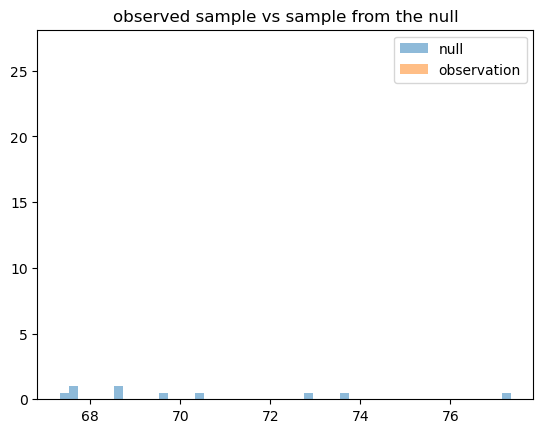

In [18]:
# plot the distribution of the observed sample vs one of the null hypothesis of the same size
_ = plt.hist(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y)),bins=50, alpha=0.5, density=True, label="null")
_ = plt.hist(Y, bins=50, alpha=0.5, density=True, label="observation")
plt.legend()
plt.title("observed sample vs sample from the null")

**TODO:** create a sample of the log likelohood ratio statistic.

In [19]:
# generate sample from the null distribution and evaluate the log likelihood ratio at each sample point 
test_stat_sample_null = [evaluateLogL_ratio(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y))) for i in range(10000)]

**TODO:** evaluate the $100%alpha$'th percentile of the distribution.

In [20]:
# evaluate the desired percentile from the sample
c = np.percentile(test_stat_sample_null, alpha*100)
print(c)

-3.7727684588091366


**TODO:** Calculate the p-value of the test.

In [21]:
# p-value
percentile = stats.percentileofscore(test_stat_sample_null, T, kind='rank')
print(percentile/100)

0.2114


**TODO:** Plot the simulate log likelihood ratio sample, and the corresponding values of $T$ and $c$.

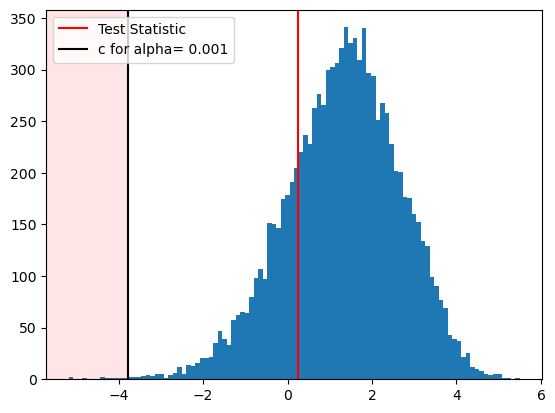

In [22]:
import matplotlib.pyplot as plt

# plot the distribution of the test statisticunder null
out = plt.hist(test_stat_sample_null, bins=100)
plt.axvline(T, color="r", label="Test Statistic")
plt.axvline(c, color="k", label=f"c for alpha= {alpha:.3f}")
(left, right) = plt.xlim()
plt.axvspan(left, c, alpha=0.1, color='red')
plt.xlim(left, right)
plt.legend()

**TODO:** What is the decision?

* If we pick values at the upper end of the background, there is a higher chance they can be in the lower tail of the transmission distribution. The result is we reject the null hypothesis and we make Type II error mistakes.

* If we pick values at the lower end of the transmission, there is a higher chance they can be in the upper tail of the background distribution. The result is we cannot reject the null and we make Type I error mistakes.